<a href="https://colab.research.google.com/github/AdriaBinteHabib/Image-Data-Preprocessing-Demo/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Dataset: [https://drive.google.com/drive/folders/1wgEEfdI3ysul74B8XCMOkXfggpiiws0z?usp=drive_link](https://)

Mounting Google Drive onto Colab

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Importing the Libraries & Dataset

In [11]:
# importing libraries
import tensorflow
import keras
import os
import glob
import skimage
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
import skimage.exposure as skie
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import prewitt_h,prewitt_v
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing and Loading the data into a data frame

dataset_path = '/content/drive/MyDrive/Thesis/ImageProcessing/Animals'
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

# apply glob module to retrieve files/pathnames

animal_path = os.path.join(dataset_path, class_names[1], '*')
animal_path = glob.glob(animal_path)


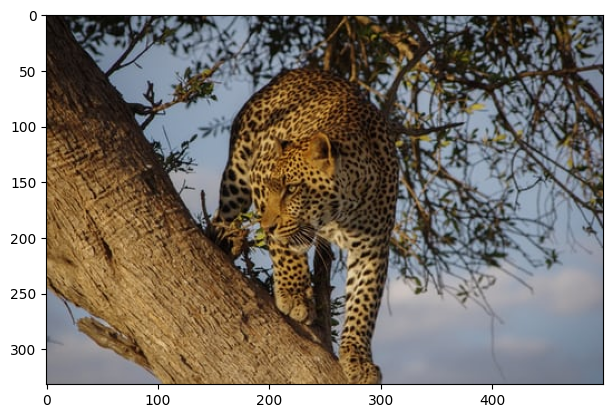

In [5]:
# accessing an image file from the dataset classes
image = io.imread(animal_path[4])

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

# Data Preprocessing

Text(0.5, 0.98, 'Original & RGB image channels')

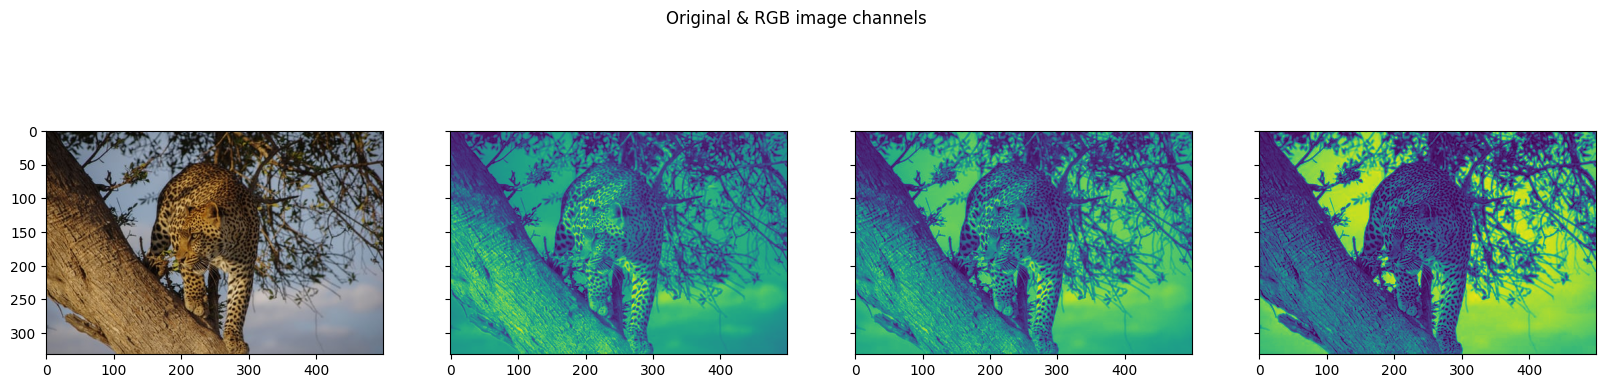

In [6]:
# plotting the original image and the RGB channels

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

Grayscale Conversion

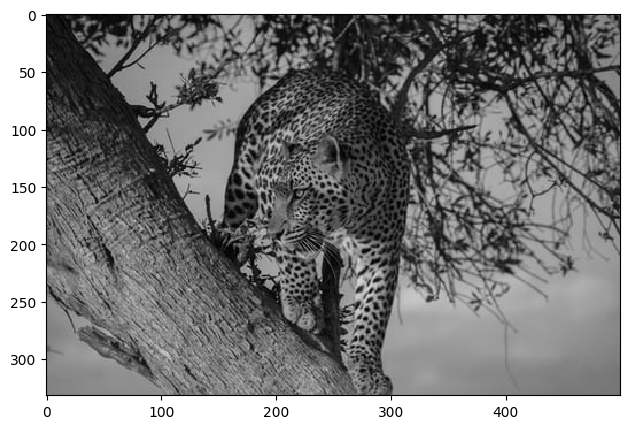

In [7]:
gray_image = rgb2gray(image)

skimage.io.imshow(gray_image)
# Here We used skimage.io.imshow() for plotting the gray image becaues plotting with matplotlib results in showing blue-green toned image.
# The reason behind this is matplotlib represents grayscale images in that way.
# You can check it by commenting out the below code.

# plt.imshow(gray_image)

Normalization

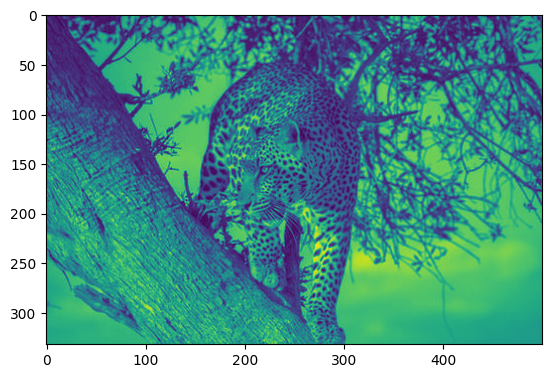

In [8]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

Adding Noise

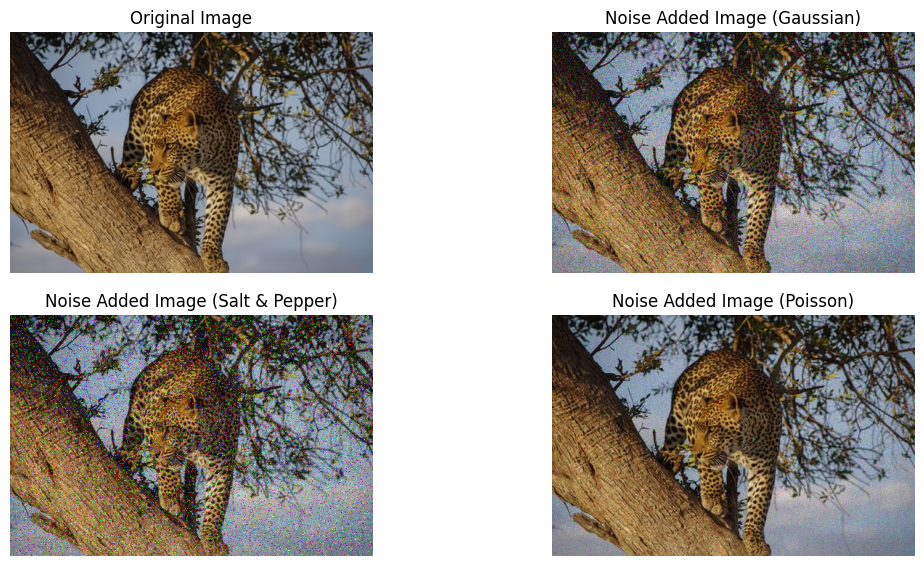

In [25]:
#Add Gaussian noise:
g_noised_image = random_noise(image, mode='gaussian')
#Add salt&pepper noise:
sp_noised_image = random_noise(image, mode='s&p', amount=0.09)
#Add Poisson noise:
poisson_noised_image =random_noise(image, mode='poisson')
#Plot all noised images with the original image:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(12,6), sharex=True, sharey=True, squeeze=True)
ax = ax.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(sp_noised_image)
ax[2].set_title('Noise Added Image (Salt & Pepper)')
ax[3].imshow(poisson_noised_image)
ax[3].set_title('Noise Added Image (Poisson)')
fig.tight_layout()
for a in ax:
    a.axis('off')

Removing Noise

<ipython-input-26-21adf0560405>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=True)
<ipython-input-26-21adf0560405>:3: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image_bilateral = denoise_bilateral(g_noised_image, multichannel=True)


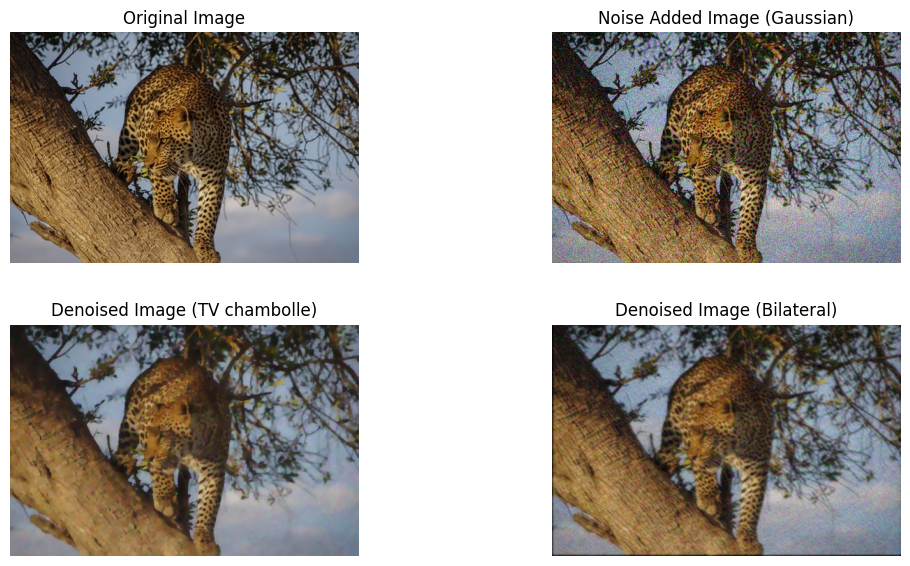

In [26]:
denoised_image_tv = denoise_tv_chambolle(g_noised_image, multichannel=True)
#Remove random noise by using Bilateral:
denoised_image_bilateral = denoise_bilateral(g_noised_image, multichannel=True)
#Plot original, noised, and denoised images:
fig, ax = plt.subplots(2,2, figsize=(12, 6), sharey=True)
ax = ax.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(g_noised_image)
ax[1].set_title('Noise Added Image (Gaussian)')
ax[2].imshow(denoised_image_tv)
ax[2].set_title('Denoised Image (TV chambolle)')
ax[3].imshow(denoised_image_bilateral)
ax[3].set_title('Denoised Image (Bilateral)')
fig.tight_layout()
for a in ax:
    a.axis('off')

Contrast Enhancement


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


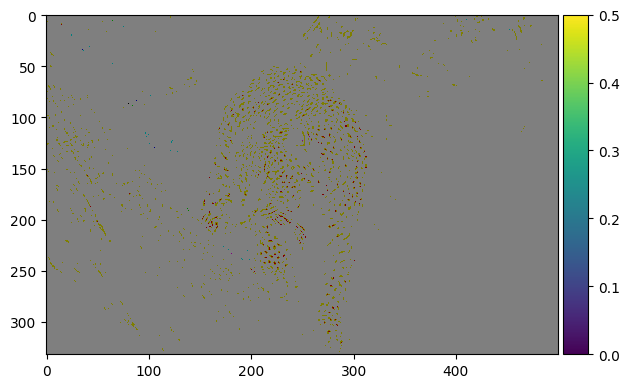

In [37]:
#  rescale_intensity() function stretches or shrinks the intensity levels of the image.
# One use case is to ensure that the whole range of values allowed by the data type is used by the image.

rescale_intensity_image = skie.rescale_intensity(image, in_range=(0.001, .005), out_range=(0, 0.5))
skimage.io.imshow(rescale_intensity_image)

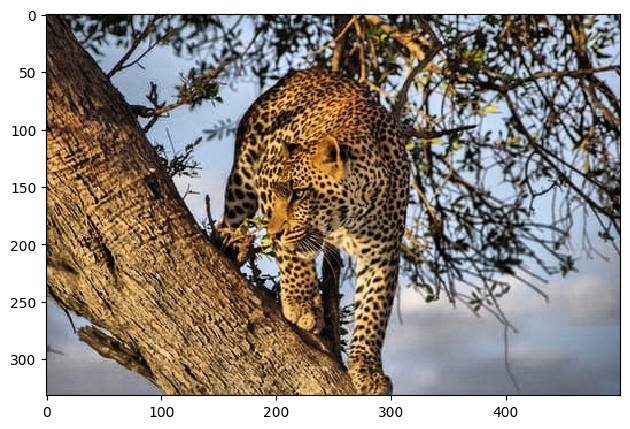

In [38]:
# equalize_adapthist() function works by splitting the image into rectangular sections and computing the histogram for each section.
# Then, the intensity values of the pixels are redistributed to improve the contrast and enhance the details.

clahe_image=skie.equalize_adapthist(image)
skimage.io.imshow(clahe_image)

Rescaling



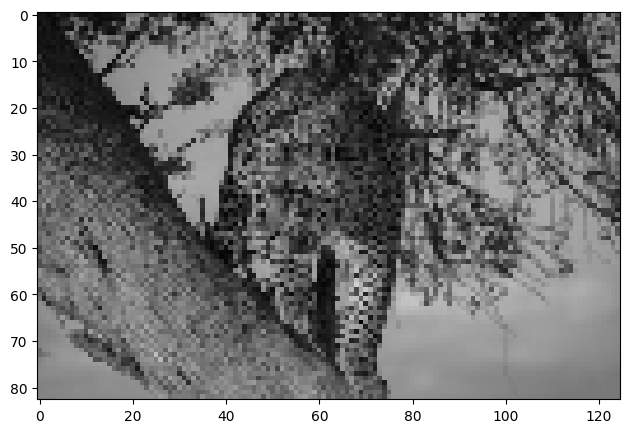

In [45]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
skimage.io.imshow(image_rescaled)


Resizing

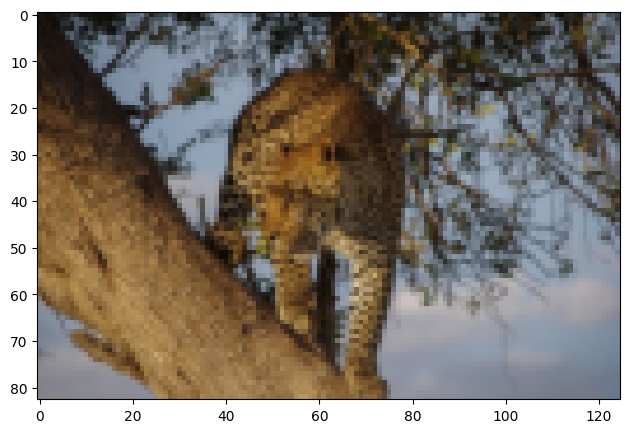

In [46]:
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),anti_aliasing=True)
skimage.io.imshow(image_resized)

Feature Extraction: Extracting Edge Features

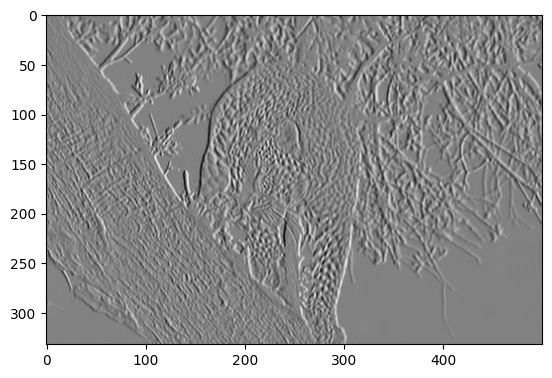

In [10]:

#reading the image
image = io.imread(animal_path[4],as_gray=True)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

plt.imshow(edges_prewitt_vertical, cmap='gray')

Data Augmentation


*   Shifting
*   Flipping
*   Rotation
*   Changing Brightness



Shifting

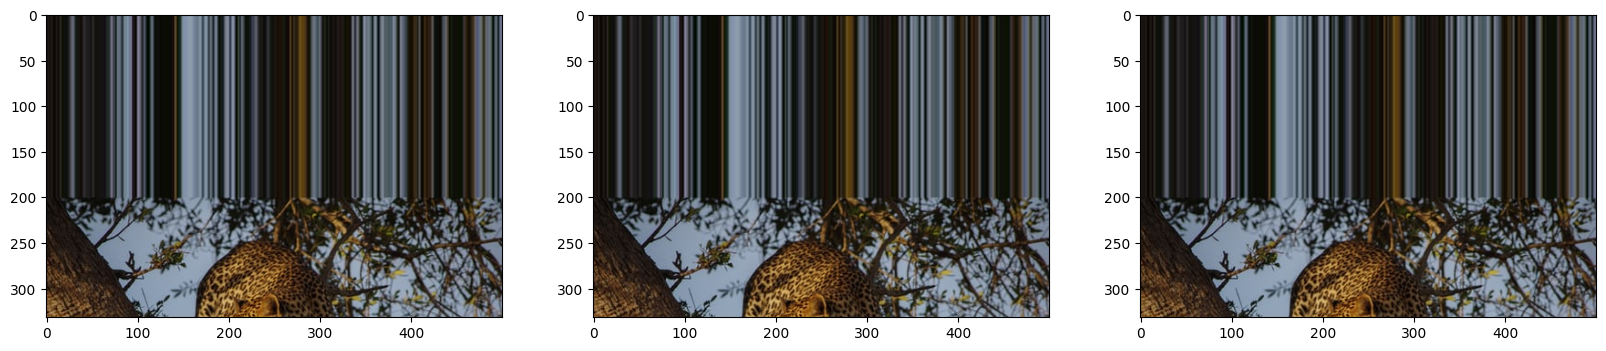

In [16]:
# import libraries

from numpy import expand_dims
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

image = io.imread(animal_path[4])

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

Flipping

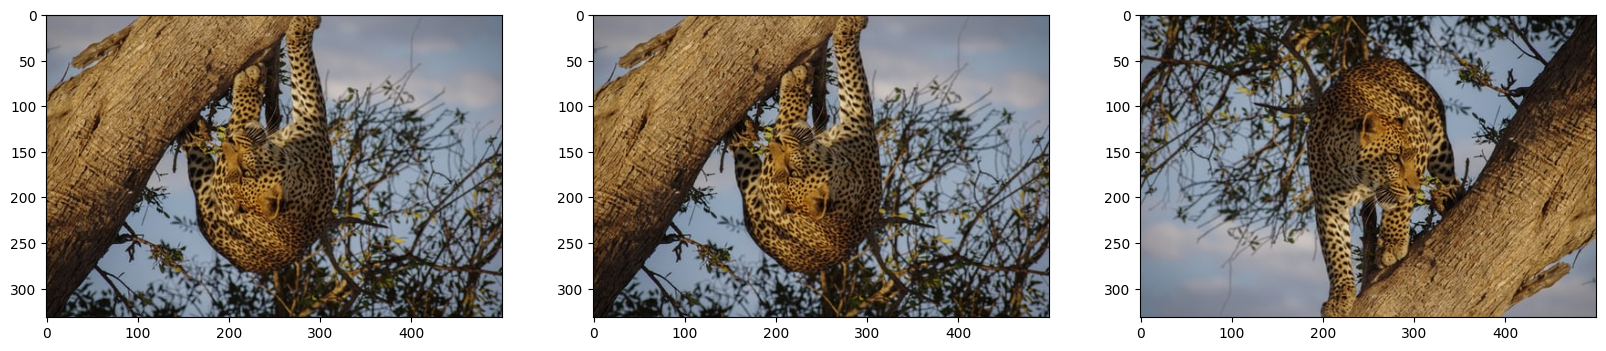

In [12]:
# import libraries

from numpy import expand_dims
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

image = io.imread(animal_path[4])
# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

Rotation


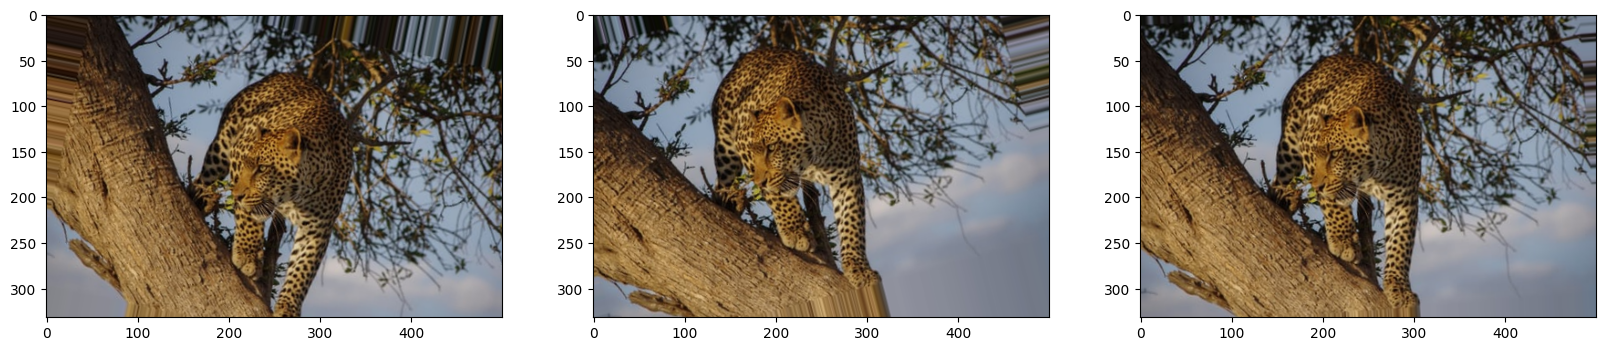

In [13]:
image = io.imread(animal_path[4])

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

Changing Brightness

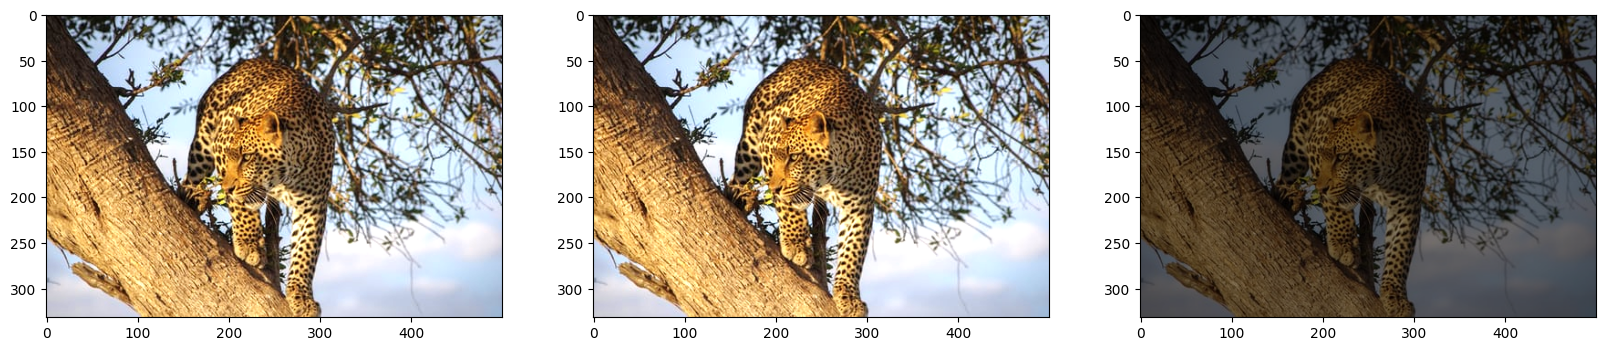

In [14]:
image = io.imread(animal_path[4])

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

Standardization

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


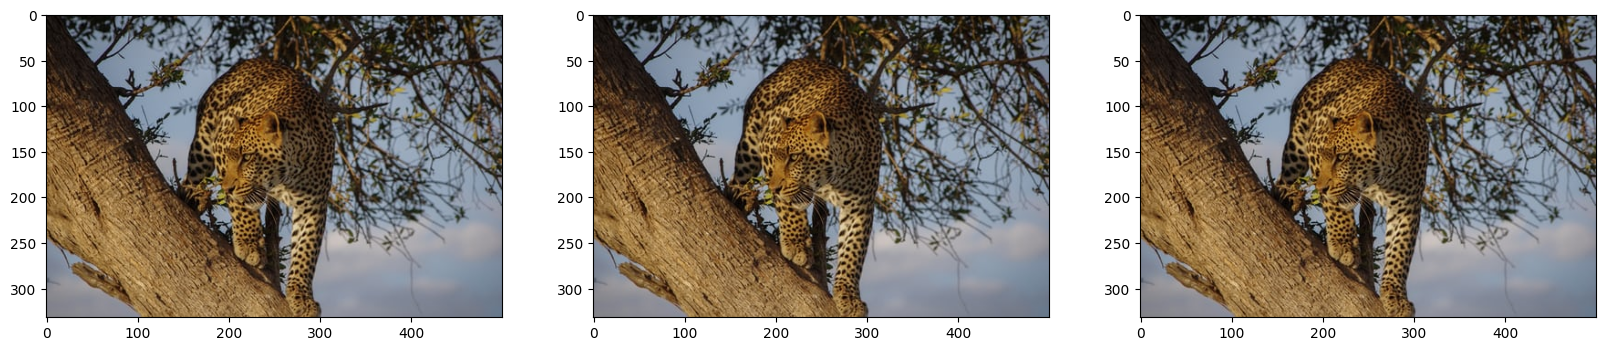

In [15]:
image = io.imread(animal_path[4])

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)